In [1]:
%pylab inline
from pandas import Series, DataFrame
from pandas_datareader.data import DataReader
from wallet.core import create_app
from wallet.model.m1 import M1Portfolio
from wallet.util.analysis import _moving_average_statistics
app = create_app(compact=True)

Populating the interactive namespace from numpy and matplotlib


/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
[2020-03-21 23:48:56,108] INFO in core: Started 


2019-09-20


,count,mean,std,min,25%,50%,75%,max,shrp,yield,down,skew
Alibaba,74.0,-0.111567,0.892475,-2.586698,-0.699909,0.188058,0.544582,1.260611,0.547279,-6.882380,22.401072,-0.811598
CSI 300,74.0,-0.089530,0.968673,-3.009172,-0.575640,0.264910,0.546454,1.403792,0.526978,-11.118701,20.174870,-1.298404
M1,74.0,-0.255831,0.816033,-3.100048,-0.328461,0.093171,0.184054,0.578308,0.421758,-19.153871,23.204637,-2.040185
S&P 500,74.0,-0.342736,1.022307,-3.782368,-0.395093,0.115942,0.250291,0.639140,0.251650,-26.363682,31.978065,-1.766553
IRA,74.0,-0.422858,1.968679,-7.145032,-0.108928,0.288110,0.500260,2.364448,0.089980,-30.432876,46.663502,-2.204711


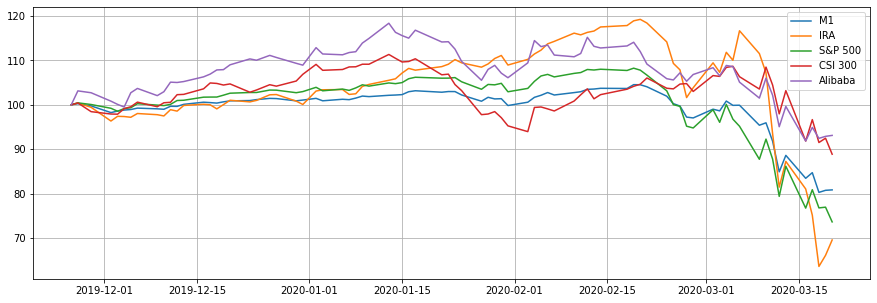

In [2]:
with app.app_context():
    m1 = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Individual', 126)})
    ira = Series({d: v for d, v, *_ in M1Portfolio.net_value_series('Roth IRA', 126)})
print(m1.index[0])
data = DataReader(['SPY', 'ASHR'], 'yahoo', m1.index[0])['Adj Close']
frame = DataFrame({
    'M1': m1,
    'IRA': ira,
    'S&P 500': data['SPY'],
    'CSI 300': data['ASHR'],
}).dropna()
for key in frame.columns:
    frame[key] *= 100 / frame[key][0]
frame.plot(figsize=(15, 5), grid=1)
_moving_average_statistics(frame, 5)

/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/che/.local/share/virtualenvs/portfolio_analysis-cXHJLPF2/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.ge

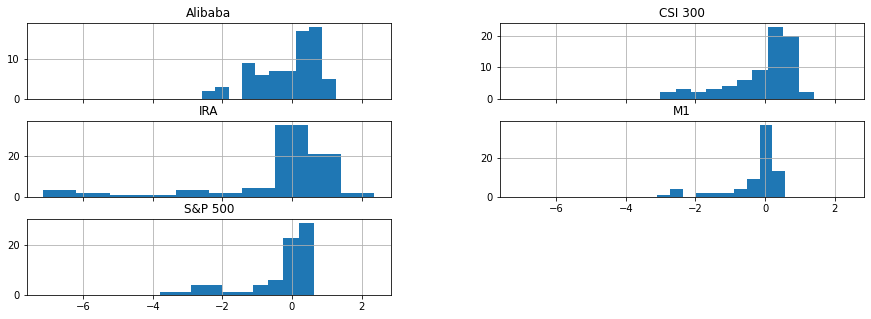

In [3]:
ret = frame.rolling(5).mean().pct_change() * 100
_ = ret.hist(sharex=1, figsize=(15, 5), layout=(2, 2))